# Functionality to create stackplot of the top producers of food items

In [2]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
import copy

Read in the Agriculture Data from FAO. See basic data information. 

In [3]:
pathToData = os.path.join(os.getcwd(), "Data", "Production_Crops_Livestock_E_All_Data.csv")
agData = pd.read_csv(pathToData, encoding="latin-1")

In [4]:
agData.head(10)

,Area Code,Area,Item Code,Item,Element Code,Element,Unit,Y1961,Y1961F,Y1962,...,Y2016,Y2016F,Y2017,Y2017F,Y2018,Y2018F,Y2019,Y2019F,Y2020,Y2020F
0,2,Afghanistan,221,"Almonds, with shell",5312,Area harvested,ha,NaN,NaN,NaN,...,19481.0,NaN,19793.0,NaN,20053.0,NaN,29203.0,NaN,22134.0,NaN
1,2,Afghanistan,221,"Almonds, with shell",5419,Yield,hg/ha,NaN,NaN,NaN,...,16859.0,Fc,13788.0,Fc,17161.0,Fc,13083.0,Fc,17759.0,Fc
2,2,Afghanistan,221,"Almonds, with shell",5510,Production,tonnes,NaN,NaN,NaN,...,32843.0,NaN,27291.0,NaN,34413.0,NaN,38205.0,NaN,39307.0,NaN
3,2,Afghanistan,711,"Anise, badian, fennel, coriander",5312,Area harvested,ha,NaN,M,NaN,...,24500.0,Im,26500.0,Im,25333.0,Im,25444.0,Im,25759.0,Im
4,2,Afghanistan,711,"Anise, badian, fennel, coriander",5419,Yield,hg/ha,NaN,NaN,NaN,...,7075.0,Fc,7149.0,Fc,7142.0,Fc,7123.0,Fc,7138.0,Fc
5,2,Afghanistan,711,"Anise, badian, fennel, coriander",5510,Production,tonnes,NaN,M,NaN,...,17333.0,Im,18944.0,Im,18093.0,Im,18123.0,Im,18387.0,Im
6,2,Afghanistan,515,Apples,5312,Area harvested,ha,2220.0,F,2220.0,...,19365.0,NaN,26847.0,NaN,28381.0,NaN,27559.0,NaN,25643.0,NaN
7,2,Afghanistan,515,Apples,5419,Yield,hg/ha,68018.0,Fc,68018.0,...,72762.0,Fc,63487.0,Fc,76527.0,Fc,90832.0,Fc,105626.0,Fc
8,2,Afghanistan,515,Apples,5510,Production,tonnes,15100.0,*,15100.0,...,140903.0,NaN,170443.0,NaN,217192.0,NaN,250324.0,NaN,270857.0,NaN
9,2,Afghanistan,526,Apricots,5312,Area harvested,ha,4820.0,F,4820.0,...,8595.0,NaN,18067.0,NaN,18510.0,NaN,17719.0,NaN,17481.0,NaN


In [5]:
agData.dtypes

Area Code         int64
Area             object
Item Code         int64
Item             object
Element Code      int64
                 ...   
Y2018F           object
Y2019           float64
Y2019F           object
Y2020           float64
Y2020F           object
Length: 127, dtype: object

In [6]:
agData.columns

Index(['Area Code', 'Area', 'Item Code', 'Item', 'Element Code', 'Element',
       'Unit', 'Y1961', 'Y1961F', 'Y1962',
       ...
       'Y2016', 'Y2016F', 'Y2017', 'Y2017F', 'Y2018', 'Y2018F', 'Y2019',
       'Y2019F', 'Y2020', 'Y2020F'],
      dtype='object', length=127)

In [7]:
# See what crops there are to choose from
itemsInData = sorted(agData["Item"].unique())
print(itemsInData)

['Agave fibres nes', 'Almonds, with shell', 'Anise, badian, fennel, coriander', 'Apples', 'Apricots', 'Areca nuts', 'Artichokes', 'Asparagus', 'Asses', 'Avocados', 'Bambara beans', 'Bananas', 'Barley', 'Bastfibres, other', 'Beans, dry', 'Beans, green', 'Beef and Buffalo Meat', 'Beehives', 'Beer of barley', 'Beeswax', 'Berries nes', 'Blueberries', 'Brazil nuts, with shell', 'Broad beans, horse beans, dry', 'Buckwheat', 'Buffaloes', 'Butter and Ghee', 'Butter and ghee, sheep milk', 'Butter, buffalo milk', 'Butter, cow milk', 'Butter, goat milk', 'Cabbages and other brassicas', 'Camelids, other', 'Camels', 'Canary seed', 'Carobs', 'Carrots and turnips', 'Cashew nuts, with shell', 'Cashewapple', 'Cassava', 'Cassava leaves', 'Castor oil seed', 'Cattle', 'Cattle and Buffaloes', 'Cauliflowers and broccoli', 'Cereals nes', 'Cereals, Total', 'Cheese (All Kinds)', 'Cheese, buffalo milk', 'Cheese, goat milk', 'Cheese, sheep milk', 'Cheese, skimmed cow milk', 'Cheese, whole cow milk', 'Cherries', 

In [59]:
def createYearList(y1, y2):
    """
        Create a list of [Yy1, Yy1 + 1, Yy1 + 2, ...., Yy2]
        Arguments:
            y1: integer, the year to start with
            y2: interger, the year to end the range
        Return a list of years between y1 and y2 inclusive   
    """
    yearCols = []
    for y in range(y1, y2 + 1):
        yearCols.append("Y" + str(y))
    return yearCols

def cropData(df, agItem):
    """
        Filter the data for a specific crop/food. 
        Argument:
            df: the dataframe
            agItem: String, the crop/food to filter for. Must be an item in the "Item" column
        Return: the agriculture data filtered by the crop/food.     
    """
    if (agItem not in itemsInData):
        txt = "{item} is not an item in the data frame".format(item = agItem)
        raise ValueError(txt)
    return df[df["Item"] == agItem]

def checkYear(year):
    """
        Check that the YEAR is within the years in the dataset. 
        Return True if it is, False otherwise.
    """
    return year >= firstYrInData and year <= lastYrInData

def getYearData(df, year1, year2, keepCols):
    """
        Get the year columns between year1 and year2
        Arguments:
            df: the dataframe
            year1: integer, the beginning year column. Between 1961 and 2020 for the agriculture dataframe.
            year2: integer, the ending year column. Between 1961 and 2020 for the agriculture dataframe.
            keepCols: list, columns besides the year columns
        Return: the ag data with the year columns only    
    """
    if (year2 < year1):
        txt = "{y2} is before {y1}".format(y2=year2, y1 = year1)
        raise ValueError(txt)
    if (not checkYear(year1) or not checkYear(year2)):
        raise ValueError("Years must be within the range of {y1} and {y2}".format(y1=year1, y2=year2))
    getCols = copy.deepcopy(keepCols)
    getCols.extend(createYearList(year1, year2))
    print(getCols)
    return df[getCols]

Filter data for a specific crop and use data from a specific range of years

In [9]:
def subsetAgData(df, crop, y1, y2, keepCols):
    """
        Get a subset of the agricultre data for the production 
        of the crop between year y1 and year y2. 
        Arguments:
            df: the dataframe.
            crop: String, the item to filter for
            y1: int, the start year for the data
            y2: int, the end year for the data
            keepCols: list of columns that are not the year columns
        Return: a subset of the agricultre dataframe
    """
    dfSubset = cropData(df, crop)
    return getYearData(dfSubset, y1, y2, keepCols)

The data includes regions rolled up into one like "Europe" and "Western Europe". On the FAO website Definitions and Standards, Area Code = Country Code, and anything with Area Code 420 and above is a region.

In [10]:
def dropRegionRows(df):
    """
        Return the agriculture data frame without the region rows. 
    """
    return df[df["Area Code"] < 420]

Get the sum, mean, median, and X highest production amounts for the crop for each year in the range

In [69]:
def getTopXPoint(arr, topX):
    """
        Get the cutoff value for the topX values in an array.
        Arguments:
            arr: a list of numbers of at least length topX.
            topX: int, the cutoff position. For top 10, topX = 10.
        Return: the cutoff value    
    """
    toReturn = copy.deepcopy(arr)
    toReturn[::-1].sort()
    return toReturn[topX - 1]

def createStatsDict(df, y1, y2, topX):
    """
        Create a dictionary for each year in a range with the sum, mean, median,
        and the X cutoff point of production amounts.
        Arguments:
            df: the dataframe
            y1: int, the start year
            y2: int, the end year of the range
            topX: int, the cuttoff position. For top 10, topX = 10
    """
    yearColumns =  createYearList(y1, y2)
    statsDict = {}
    for yearCol in yearColumns:
        arr = df[yearCol].to_numpy()
        arr[np.isnan(arr)] = 0
        statsDict[yearCol] = {"sum" : np.sum(arr), "mean": np.mean(arr), "median": np.median(arr), 
                              "topTenValue": getTopTenPoint(arr, topX)}
    return statsDict
    

In [52]:
def yearsToRows(df, yearColumns):
    """
        Use pd.melt to move the year columns to rows. 
        Arguments:
            df: the dataset (agData)
        Return: the result of running pd.melt
    """
    df = pd.melt(df, id_vars = ["Area Code", "Area", "Item", "Element", "Unit"], value_vars = yearColumns,
                    var_name = "Year", value_name="Amount")
    return df

In [67]:
def addOtherLabel(df, topX, statsDict):
    """
        Label countries that have not been in the topX producers for any
        of the years in the range as "Other". For the rest, lable will
        be the country name. 
        Arguments:
            df: the dataframe
            topX: The cutoff of the top X number of producers
            statsDict: The dictionary with the topX point
        Return: a dataframe with a Label column
    """
    country = df['Area'].to_numpy()
    year = df["Year"].to_numpy()
    amount = df["Amount"].to_numpy()
    print(statsDict)
    label = [country[i] if amount[i] >= statsDict[year[i]]["median"] else "Other" for i in range(len(country))]
    df['Label'] = label
    return df

In [14]:
def addOtherSum(df):
    """
        Add the sum of the countries labelled Other for each year into the df.
        Arguments:
            df: The dataframe
        Return: the dataframe with the other sums for each year added into it. 
    """
    otherSum = df[df["Label"] == "Other"].groupby(["Year"], as_index=False).sum()
    otherSum["Area"] = ["Other" for i in range(len(otherSum))]
    otherSum.drop("Area Code", axis=1, inplace = True)
    df.loc[df.Label == "Other", "Amount"] = 0
    df = df[["Area", "Year", "Amount"]]
    df = pd.concat([df, otherSum], ignore_index=True)
    return df

In [15]:
def createStackPlot(df):
    """
        Create the stackplot of the countries. 
    """
    df['Year'] = [int(i[1:]) for i in df['Year']]
    countryList = list(set([c for c in df['Area']]))
    plotDict = {}
    for country in countryList:
        df = df[df['Area'] == country]
        plotDict[country] = df['Amount'].values.T
    fig, ax = plt.subplots()
    ax.stackplot(df['Year'].unique(), plotDict.values(), 
                 labels = plotDict.keys())
    ax.legend(loc='upper left')
    ax.ticklabel_format(useOffset=False, style='plain')
    plt.show()

In [60]:
# Variables
agData = pd.read_csv(pathToData, encoding="latin-1")
itemsInData = sorted(agData["Item"].unique())
keepCols = ["Area Code", "Area", "Item", "Element", "Unit"]
fruit = "Oranges"
year1 = 2000
year2 = 2020
firstYrInData = 1961
lastYrInData = 2020
topX = 5

In [61]:
def plotForCrop(df, item, y1, y2, topX):
    """
        Put all the methods together and 
        create a stackplot for the item
        from y1 to y2 inclusive for the 
        top X producers. 
    """
    df = subsetAgData(df, fruit, y1, y2, keepCols)
    df = dropRegionRows(df)
    statsDict = createStatsDict(df, y1, y2, topX)
    df = yearsToRows(df, createYearList(y1, y2))
    df = addOtherLabel(df, topX, statsDict)
    df = addOtherSum(df)
    createStackPlot(df)

['Area Code', 'Area', 'Item', 'Element', 'Unit', 'Y2000', 'Y2001', 'Y2002', 'Y2003', 'Y2004', 'Y2005', 'Y2006', 'Y2007', 'Y2008', 'Y2009', 'Y2010', 'Y2011', 'Y2012', 'Y2013', 'Y2014', 'Y2015', 'Y2016', 'Y2017', 'Y2018', 'Y2019', 'Y2020']
{'Y2000': {'sum': 81618996.0, 'mean': 194794.7398568019, 'median': 24691.0, 'topTenValue': 2616220.0}, 'Y2001': {'sum': 78301117.0, 'mean': 186876.17422434367, 'median': 21174.0, 'topTenValue': 2574700.0}, 'Y2002': {'sum': 80505505.0, 'mean': 192137.2434367542, 'median': 21133.0, 'topTenValue': 2870500.0}, 'Y2003': {'sum': 78759243.0, 'mean': 187969.553699284, 'median': 20817.0, 'topTenValue': 2018616.0}, 'Y2004': {'sum': 84754121.0, 'mean': 202277.138424821, 'median': 21203.0, 'topTenValue': 2767148.0}, 'Y2005': {'sum': 83934371.0, 'mean': 200320.69451073985, 'median': 21199.0, 'topTenValue': 2740931.0}, 'Y2006': {'sum': 86860880.0, 'mean': 207305.2028639618, 'median': 23558.0, 'topTenValue': 3397011.0}, 'Y2007': {'sum': 86861612.0, 'mean': 207306.949

c:\users\14159\appdata\local\programs\python\python39\lib\site-packages\numpy\core\shape_base.py:121: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


TypeError: ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

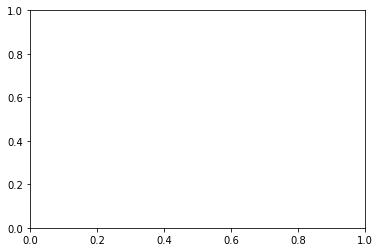

In [70]:
plotForCrop(agData, fruit, year1, year2, 5)